In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("F:/Python DS/db/iris.csv")
df = df.head(100)
df
dum_df = pd.get_dummies(df, drop_first=True)
dum_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_versicolor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [3]:

X = dum_df.iloc[:,0:4]
y = dum_df.iloc[:,4]
y


0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Species_versicolor, Length: 100, dtype: uint8

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2020,
                                                    stratify=y)

In [5]:
clf = DecisionTreeClassifier(max_depth=None,
                             random_state=2020)
clf.fit(X_train,y_train)



DecisionTreeClassifier(random_state=2020)

In [6]:
y_pred = clf.predict(X_test)


In [7]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


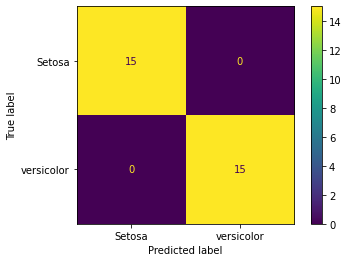

In [8]:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,display_labels=['Setosa','versicolor'])

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)



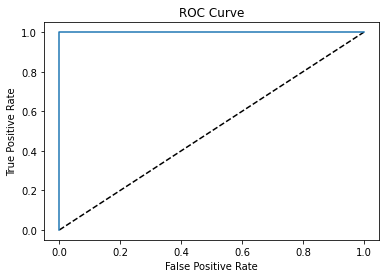

1.0

In [10]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)